In [3]:
import os
# import cv2
# import shutil
# import pandas as pd
# from shutil import move
# from subprocess import call 
# import matplotlib.pyplot as plt
# from urllib.request import urlretrieve
# from sklearn.model_selection import train_test_split

# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# %matplotlib inline

In [4]:
# Creatring Directories
base_dir = os.getcwd()

# Generating paths
extraction_points = os.path.join(base_dir, 'data','extracted_raw')
processed_data_path = os.path.join(base_dir, 'data','processed')

# Generating Directories
os.makedirs(extraction_points)
os.makedirs(processed_data_path)


In [ ]:
# Downloading the data from github
dataset_url = "http://aisdatasets.informatik.uni-freiburg.de/" \
              "freiburg_groceries_dataset/freiburg_groceries_dataset.tar.gz"

print("Downloading dataset.")
urlretrieve(dataset_url, "../freiburg_groceries_dataset.tar.gz")
print("Extracting dataset.")
call(["tar", "-xf", "../freiburg_groceries_dataset.tar.gz", "-C", extraction_points])
os.remove("../freiburg_groceries_dataset.tar.gz")
print("Done.")

In [10]:
os.listdir('data/extracted_raw/images/COFFEE/COFFEE0296.png')

['COFFEE0181.png',
 'COFFEE0115.png',
 'COFFEE0045.png',
 'COFFEE0082.png',
 'COFFEE0078.png',
 'COFFEE0201.png',
 'COFFEE0244.png',
 'COFFEE0250.png',
 'COFFEE0100.png',
 'COFFEE0135.png',
 'COFFEE0130.png',
 'COFFEE0247.png',
 'COFFEE0166.png',
 'COFFEE0272.png',
 'COFFEE0057.png',
 'COFFEE0061.png',
 'COFFEE0159.png',
 'COFFEE0255.png',
 'COFFEE0226.png',
 'COFFEE0279.png',
 'COFFEE0105.png',
 'COFFEE0280.png',
 'COFFEE0107.png',
 'COFFEE0071.png',
 'COFFEE0086.png',
 'COFFEE0112.png',
 'COFFEE0225.png',
 'COFFEE0202.png',
 'COFFEE0230.png',
 'COFFEE0037.png',
 'COFFEE0175.png',
 'COFFEE0034.png',
 'COFFEE0002.png',
 'COFFEE0265.png',
 'COFFEE0213.png',
 'COFFEE0186.png',
 'COFFEE0157.png',
 'COFFEE0125.png',
 'COFFEE0297.png',
 'COFFEE0228.png',
 'COFFEE0136.png',
 'COFFEE0010.png',
 'COFFEE0039.png',
 'COFFEE0171.png',
 'COFFEE0137.png',
 'COFFEE0102.png',
 'COFFEE0227.png',
 'COFFEE0076.png',
 'COFFEE0049.png',
 'COFFEE0005.png',
 'COFFEE0132.png',
 'COFFEE0016.png',
 'COFFEE0221

In [11]:
image_path = 'data/extracted_raw/images/COFFEE/COFFEE0296.png'
image_matrix = cv2.imread(image_path)
image_matrix.shape

(256, 256, 3)

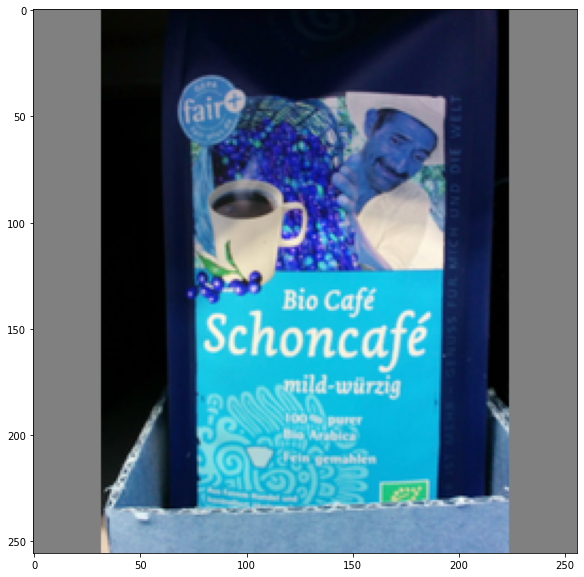

In [12]:
plt.figure(figsize = (24,10))
plt.imshow(image_matrix)


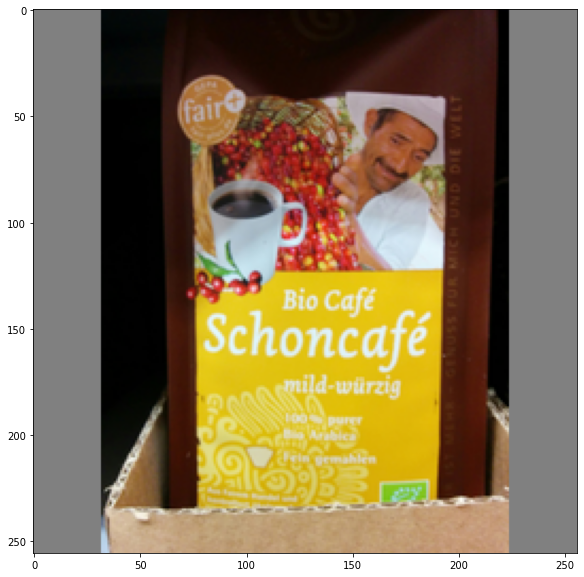

In [13]:
plt.figure(figsize = (24,10))
plt.imshow(cv2.cvtColor(image_matrix, cv2.COLOR_RGB2BGR))

# ImageDataGenerator() > used for Data Augmentation

### Base_dir
### train_dir
#### Class_1
#### Class_2
#### Class_3

### test_dir
#### class_1
#### class_2
#### class_3

In [14]:
def directory_system_generator(source_directory, sink_directory):
  train_path, test_path = os.path.join(sink_directory,'train'), os.path.join(sink_directory,'test')

  classes = os.listdir(source_directory)

  train_classes_path = [os.path.join(train_path,class_)for class_ in classes]
  test_classes_path = [os.path.join(test_path,class_) for class_ in classes]

  print('working on the traing directories ')
  try:
    list(map(os.makedirs, train_classes_path))
  except Exception as e:
    print('Directories already exists')

  print('Working on the testing Ditrectories')

  try:
    list(map(os.makedirs, test_classes_path))
  except Exception as e:
    print('Directories already exists')

  print('*'*114)
  print('Sucessfull')


  return train_path, test_path, classes

In [15]:
image_folder = os.path.join(extraction_points,'images')

train_path, test_path, classes = directory_system_generator(source_directory = image_folder, sink_directory = processed_data_path  )

working on the traing directories 
Working on the testing Ditrectories
******************************************************************************************************************
Sucessfull


In [18]:
source_dir = image_folder

for class_ in sorted(classes):
  print(f'total images in {class_} class :{len(os.listdir(os.path.join(source_dir,class_)))}')

total images in BEANS class :136
total images in CAKE class :161
total images in CANDY class :372
total images in CEREAL class :278
total images in CHIPS class :181
total images in CHOCOLATE class :307
total images in COFFEE class :298
total images in CORN class :97
total images in FISH class :110
total images in FLOUR class :109
total images in HONEY class :185
total images in JAM class :241
total images in JUICE class :302
total images in MILK class :162
total images in NUTS class :168
total images in OIL class :143
total images in PASTA class :172
total images in RICE class :150
total images in SODA class :177
total images in SPICES class :207
total images in SUGAR class :118
total images in TEA class :283
total images in TOMATO_SAUCE class :171
total images in VINEGAR class :157
total images in WATER class :262


In [25]:
def files_mover(source_directory, sink_directory, classes, test_size = 0.2, random_state = 64, format = '.png'):
  for class_name in classes:
    print(f'Working on {class_name} class')

    class_src_path = os.path.join(source_directory, class_name)
    all_images = [i for i in os.listdir(class_src_path) if i.endswith(format)]
    print(f'total images found : {len(all_images)}')
    train, test = train_test_split(all_images, test_size = test_size, random_state = random_state)
    print(f'Train data count : {len(train)}')
    print(f'Test data count : {len(test)}')

    train_source_path = [os.path.join(class_src_path, file_path) for file_path in train]
    training_data_sink = os.path.join(sink_directory, 'train',class_name)
    print(f'Training data sink path : {training_data_sink}')
    train_sink_paths = [os.path.join(training_data_sink, file_path) for file_path in train]

    test_source_paths = [os.path.join(class_src_path, file_path) for file_path in test ]
    testing_data_sink = os.path.join(sink_directory, 'test',class_name)
    print(f'Testing data sink path : {testing_data_sink}')
    test_sink_paths = [os.path.join(testing_data_sink, file_path) for file_path in test]

    list(map(move, train_source_path, train_sink_paths ))
    list(map(move, test_source_paths, test_sink_paths ))

    print(f'all files move for {class_name} class')
    print('*'* 114)
print('sucessfull')



sucessfull


In [26]:
files_mover(source_directory = image_folder, sink_directory = processed_data_path, classes = classes )

Working on BEANS class
total images found : 86
Train data count : 68
Test data count : 18
Training data sink path : /content/data/processed/train/BEANS
Testing data sink path : /content/data/processed/test/BEANS
all files move for BEANS class
******************************************************************************************************************
Working on SODA class
total images found : 112
Train data count : 89
Test data count : 23
Training data sink path : /content/data/processed/train/SODA
Testing data sink path : /content/data/processed/test/SODA
all files move for SODA class
******************************************************************************************************************
Working on CANDY class
total images found : 237
Train data count : 189
Test data count : 48
Training data sink path : /content/data/processed/train/CANDY
Testing data sink path : /content/data/processed/test/CANDY
all files move for CANDY class
******************************************

# Modeling 

In [28]:
# Confifurations
SEED = 32
BATCH_SIZE = 64
TARGET_SIZE = (256,256)

In [30]:
# Processing and generating the train data 
train_datagenerator = ImageDataGenerator(rescale = 1/255,
                                         zoom_range = 0.3,
                                         height_shift_range = 0.2,
                                         width_shift_range = 0.2,
                                         shear_range = 0.2,
                                         vertical_flip = True,
                                         horizontal_flip = True,
                                         fill_mode = 'nearest')


train_data = train_datagenerator.flow_from_directory(directory = train_path,
                                                     target_size = TARGET_SIZE,
                                                     batch_size = BATCH_SIZE,
                                                     classes = classes,
                                                     class_mode = 'categorical',
                                                     seed = SEED) 

test_data = train_datagenerator.flow_from_directory(directory = test_path,
                                                     target_size = TARGET_SIZE,
                                                     batch_size = BATCH_SIZE,
                                                     classes = classes,
                                                     class_mode = 'categorical',
                                                     seed = SEED) 


Found 2506 images belonging to 25 classes.
Found 2441 images belonging to 25 classes.


# CNN

In [31]:
elu = tf.keras.layers.ELU()

In [35]:
# ------ Building the base model ----
cnn = tf.keras.Sequential()

# Adding the input layer
cnn.add(tf.keras.layers.Input(shape = (256,256,3)))

# Adding the first conv-pooling layers
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,padding = 'same' ))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2, padding = 'same' ))

# Adding the second conv-pooling layers
cnn.add(tf.keras.layers.Conv2D(filters = 40, kernel_size = 3,padding = 'same' ))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2, padding = 'same' ))

# Adding the third conv-pooling layers
cnn.add(tf.keras.layers.Conv2D(filters = 60, kernel_size = 3,padding = 'same' ))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2, padding = 'same' ))

# Flattening the features
cnn.add(tf.keras.layers.Flatten())

# Adding the ANN
cnn.add(tf.keras.layers.Dense(units = 512, activation = 'relu', kernel_initializer = 'he_normal'))
cnn.add(tf.keras.layers.Dense(units = 256, activation = 'relu', kernel_initializer = 'he_normal'))
cnn.add(tf.keras.layers.Dense(units = 512, activation = 'relu', kernel_initializer = 'he_normal'))
cnn.add(tf.keras.layers.Dense(units = len(classes), activation = 'softmax', kernel_initializer = 'glorot_uniform'))

#------- Compiling the model ----
cnn.compile(optimizer = 'rmsprop',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy','Recall'])


In [36]:
# Summarizing the model 
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 40)      11560     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 40)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 60)        21660     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 60)       0

In [37]:
cnn_history = cnn.fit_generator(generator = train_data,
                                validation_data = test_data,
                                epochs = 50,
                                use_multiprocessing = True,
                                workers = 35)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
40/40 [==============================] - 118s 2s/step - loss: 8.8003 - accuracy: 0.0678 - recall: 0.0140 - val_loss: 4.4884 - val_accuracy: 0.0565 - val_recall: 0.0410
Epoch 2/50
40/40 [==============================] - 106s 2s/step - loss: 3.4597 - accuracy: 0.0746 - recall: 0.0048 - val_loss: 3.7151 - val_accuracy: 0.0733 - val_recall: 0.0053
Epoch 3/50
40/40 [==============================] - 106s 2s/step - loss: 3.3599 - accuracy: 0.0890 - recall: 0.0064 - val_loss: 3.2425 - val_accuracy: 0.0610 - val_recall: 0.0000e+00
Epoch 4/50
40/40 [==============================] - 131s 3s/step - loss: 3.1596 - accuracy: 0.0786 - recall: 0.0036 - val_loss: 3.4833 - val_accuracy: 0.0832 - val_recall: 0.0123
Epoch 5/50
40/40 [==============================] - 106s 2s/step - loss: 3.2450 - accuracy: 0.0994 - recall: 0.0064 - val_loss: 3.1445 - val_accuracy: 0.0979 - val_recall: 0.0102
Epoch 6/50
40/40 [==============================] - 105s 2s/step - loss: 3.0138 - accuracy: 0.1313 - 

Process Keras_worker_ForkPoolWorker-4154:
Process Keras_worker_ForkPoolWorker-4109:
Process Keras_worker_ForkPoolWorker-4124:
Process Keras_worker_ForkPoolWorker-4139:
Process Keras_worker_ForkPoolWorker-4129:
Process Keras_worker_ForkPoolWorker-4155:
Process Keras_worker_ForkPoolWorker-4105:
Process Keras_worker_ForkPoolWorker-4112:
Process Keras_worker_ForkPoolWorker-4102:
Process Keras_worker_ForkPoolWorker-4113:
Process Keras_worker_ForkPoolWorker-4107:
Process Keras_worker_ForkPoolWorker-4121:
Process Keras_worker_ForkPoolWorker-4120:
Process Keras_worker_ForkPoolWorker-4137:
Process Keras_worker_ForkPoolWorker-4143:
Process Keras_worker_ForkPoolWorker-4134:
Process Keras_worker_ForkPoolWorker-4131:
Process Keras_worker_ForkPoolWorker-4110:
Process Keras_worker_ForkPoolWorker-4141:
Process Keras_worker_ForkPoolWorker-4103:
Process Keras_worker_ForkPoolWorker-4148:
Process Keras_worker_ForkPoolWorker-4096:
Process Keras_worker_ForkPoolWorker-4098:
Process Keras_worker_ForkPoolWorke

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-aedd8c3bf9ad>", line 5, in <module>
    workers = 35)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 2223, in fit_generator
    initial_epoch=initial_epoch)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1431, in fit
    _use_cached_eval_dataset=True)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1716, in evaluate
    tmp_logs = self.test_function(iterator)
  File "/usr/local/lib/python3.7/dist-packages/te

  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()


KeyboardInterrupt: ignored

  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File 